# Mild introduction to Xarray

Based on Ondřej Grover's [PyData Prague Talk 5.10.2020](https://github.com/smartass101/xarray-pydata-prague-2020)

Motivation for xarray:
* Labels and named dimensions for numpy --> indexing, broadcasting.
* More dimensions than Pandas (essentially) 2-D DataFrame.

### Enter `xarray`

<div>
<img src="https://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" alt="xarray logo" style="float:left; width:49%;">
<img src="https://xarray.pydata.org/en/stable/_images/numfocus_logo.png" alt="NumFOCUS logo" style="float:left; width: 49%;">
</div>


- pure Python with (optional) compiled dependencies (NumPy, Pandas, NetCDF, ...)
- superb, well-structured documentation with many examples: [xarray.pydata.org](https://xarray.pydata.org/en/stable/index.html)



Brief historical context:
- evolution of an internal tool developed at The Climate Corporation 
- released as open source in May 2014 as `xray`, renamed in January 2016
- became a fiscally sponsored project of NumFOCUS in August 2018


### Xarray's answers to the motivation: 

* assigns names to dimensions ... axis=N -> dim='name' (in wrapped functions/methods)
    * no need to remember dimension ordering
    * if dimension missing : dim='name' fails explicitly vs. axis=N might pack a surprise for later ...
* uses and generalizes Pandas indexing machinery into multiple-dimensions
* handles broadcasting according to dimensions names
    * checks if dimension sizes match (and/or aligns by associated coordinate indices if available)
    * reshaping, transposing, ... for arithmetic operations
    * handles *ufunc* broadcasting via `apply_ufunc` helper API
 

## `DataArray`:  Multi-dimensional array with associated coordinates

[`DataArray`](https://xarray.pydata.org/en/stable/data-structures.html#dataarray)
is a multi-dimensional array with extra information added. It contains (to quote the official documentation):

- `values`: a numpy.ndarray holding the array’s values

- `dims`: dimension names for each axis (e.g., ('x', 'y', 'z'))

- `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)

- `attrs`: dict to hold arbitrary metadata (attributes)

- `name`: optional name of the array

The `dims` are always present (if you do not see them, they are created automatically), `coords` are optional.
When specifying axes (e.g. for partial aggregations), you use their "dim" names instead of numbers (difference from `numpy`)
and you can index the points using the coordinate values (this is similar to `pandas` `.loc` indexing).

Let's create an array that contains intensity of a laser beam at each point in a plane, as evolving in time.
(Note: sorry for the Gaussian approximation in all dimensions!):

In [ ]:
import numpy as np
import xarray as xr

# Coordinates
x = np.linspace(-10, 10, 11)
y = np.linspace(-10, 10, 11)
t = np.linspace(-1e-12, 1e-12, 10)

# Profile (in arbitrary units)
# Use bradcasting to form a proper cartesian product
data = (
    np.exp(-((x[:, np.newaxis, np.newaxis] / 5) ** 2))
    * np.exp(-((y[np.newaxis, :, np.newaxis] / 5) ** 2))
    * np.exp(-((t[np.newaxis, np.newaxis, :] / 5e-13) ** 2))
)

laser_intensity = xr.DataArray(
    data, 
    dims=('x', 'y', 't'),                   # Names of the "axes"
    name='intensity',
    coords={'x': x, 'y': y, 't': t},        # Values for the dimensions (optional or partial)
    attrs={'profile_type': 'gaussian'},     # Arbitrary user-defined data
)

laser_intensity

<xarray.DataArray 'intensity' (x: 11, y: 11, t: 10)>
array([[[6.14421235e-06, 2.98372458e-05, 9.76063601e-05, ...,
         9.76063601e-05, 2.98372458e-05, 6.14421235e-06],
        [2.59328514e-05, 1.25933938e-04, 4.11966756e-04, ...,
         4.11966756e-04, 1.25933938e-04, 2.59328514e-05],
        [7.94804086e-05, 3.85969161e-04, 1.26261804e-03, ...,
         1.26261804e-03, 3.85969161e-04, 7.94804086e-05],
        ...,
        [7.94804086e-05, 3.85969161e-04, 1.26261804e-03, ...,
         1.26261804e-03, 3.85969161e-04, 7.94804086e-05],
        [2.59328514e-05, 1.25933938e-04, 4.11966756e-04, ...,
         4.11966756e-04, 1.25933938e-04, 2.59328514e-05],
        [6.14421235e-06, 2.98372458e-05, 9.76063601e-05, ...,
         9.76063601e-05, 2.98372458e-05, 6.14421235e-06]],

       [[2.59328514e-05, 1.25933938e-04, 4.11966756e-04, ...,
         4.11966756e-04, 1.25933938e-04, 2.59328514e-05],
        [1.09454677e-04, 5.31528847e-04, 1.73878636e-03, ...,
         1.73878636e-03, 5.31528847e-04, 1.09454677e-04],
        [3.35462628e-04, 1.62905842e-03, 5.32912670e-03, ...,
         5.32912670e-03, 1.62905842e-03, 3.35462628e-04],
...
        [3.35462628e-04, 1.62905842e-03, 5.32912670e-03, ...,
         5.32912670e-03, 1.62905842e-03, 3.35462628e-04],
        [1.09454677e-04, 5.31528847e-04, 1.73878636e-03, ...,
         1.73878636e-03, 5.31528847e-04, 1.09454677e-04],
        [2.59328514e-05, 1.25933938e-04, 4.11966756e-04, ...,
         4.11966756e-04, 1.25933938e-04, 2.59328514e-05]],

       [[6.14421235e-06, 2.98372458e-05, 9.76063601e-05, ...,
         9.76063601e-05, 2.98372458e-05, 6.14421235e-06],
        [2.59328514e-05, 1.25933938e-04, 4.11966756e-04, ...,
         4.11966756e-04, 1.25933938e-04, 2.59328514e-05],
        [7.94804086e-05, 3.85969161e-04, 1.26261804e-03, ...,
         1.26261804e-03, 3.85969161e-04, 7.94804086e-05],
        ...,
        [7.94804086e-05, 3.85969161e-04, 1.26261804e-03, ...,
         1.26261804e-03, 3.85969161e-04, 7.94804086e-05],
        [2.59328514e-05, 1.25933938e-04, 4.11966756e-04, ...,
         4.11966756e-04, 1.25933938e-04, 2.59328514e-05],
        [6.14421235e-06, 2.98372458e-05, 9.76063601e-05, ...,
         9.76063601e-05, 2.98372458e-05, 6.14421235e-06]]])
Coordinates:
  * x        (x) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
  * y        (y) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
  * t        (t) float64 -1e-12 -7.778e-13 -5.556e-13 ... 7.778e-13 1e-12
Attributes:
    profile_type:  gaussian

All the specified information is accessible via eponymous properties:

In [ ]:
laser_intensity.values

array([[[6.14421235e-06, 2.98372458e-05, 9.76063601e-05, ...,
         9.76063601e-05, 2.98372458e-05, 6.14421235e-06],
        [2.59328514e-05, 1.25933938e-04, 4.11966756e-04, ...,
         4.11966756e-04, 1.25933938e-04, 2.59328514e-05],
        [7.94804086e-05, 3.85969161e-04, 1.26261804e-03, ...,
         1.26261804e-03, 3.85969161e-04, 7.94804086e-05],
        ...,
        [7.94804086e-05, 3.85969161e-04, 1.26261804e-03, ...,
         1.26261804e-03, 3.85969161e-04, 7.94804086e-05],
        [2.59328514e-05, 1.25933938e-04, 4.11966756e-04, ...,
         4.11966756e-04, 1.25933938e-04, 2.59328514e-05],
        [6.14421235e-06, 2.98372458e-05, 9.76063601e-05, ...,
         9.76063601e-05, 2.98372458e-05, 6.14421235e-06]],

       [[2.59328514e-05, 1.25933938e-04, 4.11966756e-04, ...,
         4.11966756e-04, 1.25933938e-04, 2.59328514e-05],
        [1.09454677e-04, 5.31528847e-04, 1.73878636e-03, ...,
         1.73878636e-03, 5.31528847e-04, 1.09454677e-04],
        [3.35462628e-04, 

In [ ]:
laser_intensity.dims

('x', 'y', 't')

In [ ]:
laser_intensity.coords

Coordinates:
  * x        (x) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
  * y        (y) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
  * t        (t) float64 -1e-12 -7.778e-13 -5.556e-13 ... 7.778e-13 1e-12

Note that the coordinates themselves are `DataArray`s:

In [ ]:
laser_intensity.coords["t"]

<xarray.DataArray 't' (t: 10)>
array([-1.000000e-12, -7.777778e-13, -5.555556e-13, -3.333333e-13,
       -1.111111e-13,  1.111111e-13,  3.333333e-13,  5.555556e-13,
        7.777778e-13,  1.000000e-12])
Coordinates:
  * t        (t) float64 -1e-12 -7.778e-13 -5.556e-13 ... 7.778e-13 1e-12

The coordinates (unless there is a name clash) can be accessed directly as keys of the array or even as attributes.

In [ ]:
laser_intensity["t"]

<xarray.DataArray 't' (t: 10)>
array([-1.000000e-12, -7.777778e-13, -5.555556e-13, -3.333333e-13,
       -1.111111e-13,  1.111111e-13,  3.333333e-13,  5.555556e-13,
        7.777778e-13,  1.000000e-12])
Coordinates:
  * t        (t) float64 -1e-12 -7.778e-13 -5.556e-13 ... 7.778e-13 1e-12

## Indexing

Similarly to pandas, you can access individual values (and slices) 
in `DataArrays` (and `Datasets`, see below) using both the numeric order
and labels (from the coordinates).

To bring the similarility even further, xarray automatically creates
pandas indices for you:

In [ ]:
laser_intensity.indexes

x: Float64Index([-10.0, -8.0, -6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0], dtype='float64', name='x')
y: Float64Index([-10.0, -8.0, -6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0], dtype='float64', name='y')
t: Float64Index([                -1e-12, -7.777777777777778e-13,
                 -5.555555555555556e-13, -3.333333333333333e-13,
                 -1.111111111111111e-13,  1.111111111111112e-13,
                  3.333333333333334e-13,  5.555555555555556e-13,
                  7.777777777777778e-13,                  1e-12],
                dtype='float64', name='t')

To select the first 5 measurements for the top-left point (before t=0),
you can use numpy-like indexing with the correct order of axes:

In [ ]:
laser_intensity[0,0,:5]

<xarray.DataArray 'intensity' (t: 5)>
array([6.14421235e-06, 2.98372458e-05, 9.76063601e-05, 2.15092058e-04,
       3.19298960e-04])
Coordinates:
    x        float64 -10.0
    y        float64 -10.0
  * t        (t) float64 -1e-12 -7.778e-13 -5.556e-13 -3.333e-13 -1.111e-13
Attributes:
    profile_type:  gaussian

Like in pandas, you can use the `.loc` accessor and provide value-based
indices:

In [ ]:
laser_intensity.loc[-10,-10,-np.inf:0]

<xarray.DataArray 'intensity' (t: 5)>
array([6.14421235e-06, 2.98372458e-05, 9.76063601e-05, 2.15092058e-04,
       3.19298960e-04])
Coordinates:
    x        float64 -10.0
    y        float64 -10.0
  * t        (t) float64 -1e-12 -7.778e-13 -5.556e-13 -3.333e-13 -1.111e-13
Attributes:
    profile_type:  gaussian

Even better:

In [ ]:
laser_intensity.loc[
    {"x": -10,
     "y": -10,
     "t": slice(-np.inf, 0)  # We must construct the slice manually :-(
    }
]

<xarray.DataArray 'intensity' (t: 5)>
array([6.14421235e-06, 2.98372458e-05, 9.76063601e-05, 2.15092058e-04,
       3.19298960e-04])
Coordinates:
    x        float64 -10.0
    y        float64 -10.0
  * t        (t) float64 -1e-12 -7.778e-13 -5.556e-13 -3.333e-13 -1.111e-13
Attributes:
    profile_type:  gaussian

In [ ]:
laser_intensity.loc[0,0,0]

KeyError: 0.0

The `.sel` method works similarly but it can also find a "reasonable" value whenever there is no exact match in the coordinates:

In [ ]:
laser_intensity.sel(x=0, y=0, t=0, method="nearest")

<xarray.DataArray 'intensity' ()>
array(0.95181678)
Coordinates:
    x        float64 0.0
    y        float64 0.0
    t        float64 -1.111e-13
Attributes:
    profile_type:  gaussian

Alternatively, you may want to interpolate (if you know what you are doing) to a point or array of points:

In [ ]:
laser_intensity.interp(x=0, y=0, t=np.linspace(0, 1e-12, 10), method="linear")  # The peak around 0 is symmetric :-/

<xarray.DataArray 'intensity' (t: 10)>
array([0.95181678, 0.95181678, 0.79649859, 0.64118039, 0.46607042,
       0.29096046, 0.18995202, 0.08894358, 0.05362961, 0.01831564])
Coordinates:
    x        int64 0
    y        int64 0
  * t        (t) float64 0.0 1.111e-13 2.222e-13 ... 7.778e-13 8.889e-13 1e-12
Attributes:
    profile_type:  gaussian

In [ ]:
laser_intensity.interp(x=0, y=0, t=np.linspace(0, 1e-12, 10), method="cubic")

<xarray.DataArray 'intensity' (t: 10)>
array([0.99803059, 0.95181678, 0.82055962, 0.64118039, 0.45494494,
       0.29096046, 0.16966059, 0.08894358, 0.0410738 , 0.01831564])
Coordinates:
    x        int64 0
    y        int64 0
  * t        (t) float64 0.0 1.111e-13 2.222e-13 ... 7.778e-13 8.889e-13 1e-12
Attributes:
    profile_type:  gaussian

## Arithmetics & aggregations

With respect to traditional maths operators, the arrays work intuitively like you would expect
from numpy or pandas, matching on dimension names/values and broadcasting when a dimension is not present.


In [ ]:
laser_intensity / 2

<xarray.DataArray 'intensity' (x: 11, y: 11, t: 10)>
array([[[3.07210618e-06, 1.49186229e-05, 4.88031801e-05, ...,
         4.88031801e-05, 1.49186229e-05, 3.07210618e-06],
        [1.29664257e-05, 6.29669692e-05, 2.05983378e-04, ...,
         2.05983378e-04, 6.29669692e-05, 1.29664257e-05],
        [3.97402043e-05, 1.92984580e-04, 6.31309022e-04, ...,
         6.31309022e-04, 1.92984580e-04, 3.97402043e-05],
        ...,
        [3.97402043e-05, 1.92984580e-04, 6.31309022e-04, ...,
         6.31309022e-04, 1.92984580e-04, 3.97402043e-05],
        [1.29664257e-05, 6.29669692e-05, 2.05983378e-04, ...,
         2.05983378e-04, 6.29669692e-05, 1.29664257e-05],
        [3.07210618e-06, 1.49186229e-05, 4.88031801e-05, ...,
         4.88031801e-05, 1.49186229e-05, 3.07210618e-06]],

       [[1.29664257e-05, 6.29669692e-05, 2.05983378e-04, ...,
         2.05983378e-04, 6.29669692e-05, 1.29664257e-05],
        [5.47273387e-05, 2.65764424e-04, 8.69393182e-04, ...,
         8.69393182e-04, 2.65764424e-04, 5.47273387e-05],
        [1.67731314e-04, 8.14529211e-04, 2.66456335e-03, ...,
         2.66456335e-03, 8.14529211e-04, 1.67731314e-04],
...
        [1.67731314e-04, 8.14529211e-04, 2.66456335e-03, ...,
         2.66456335e-03, 8.14529211e-04, 1.67731314e-04],
        [5.47273387e-05, 2.65764424e-04, 8.69393182e-04, ...,
         8.69393182e-04, 2.65764424e-04, 5.47273387e-05],
        [1.29664257e-05, 6.29669692e-05, 2.05983378e-04, ...,
         2.05983378e-04, 6.29669692e-05, 1.29664257e-05]],

       [[3.07210618e-06, 1.49186229e-05, 4.88031801e-05, ...,
         4.88031801e-05, 1.49186229e-05, 3.07210618e-06],
        [1.29664257e-05, 6.29669692e-05, 2.05983378e-04, ...,
         2.05983378e-04, 6.29669692e-05, 1.29664257e-05],
        [3.97402043e-05, 1.92984580e-04, 6.31309022e-04, ...,
         6.31309022e-04, 1.92984580e-04, 3.97402043e-05],
        ...,
        [3.97402043e-05, 1.92984580e-04, 6.31309022e-04, ...,
         6.31309022e-04, 1.92984580e-04, 3.97402043e-05],
        [1.29664257e-05, 6.29669692e-05, 2.05983378e-04, ...,
         2.05983378e-04, 6.29669692e-05, 1.29664257e-05],
        [3.07210618e-06, 1.49186229e-05, 4.88031801e-05, ...,
         4.88031801e-05, 1.49186229e-05, 3.07210618e-06]]])
Coordinates:
  * x        (x) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
  * y        (y) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
  * t        (t) float64 -1e-12 -7.778e-13 -5.556e-13 ... 7.778e-13 1e-12

In [ ]:
laser_intensity > 1e-6

<xarray.DataArray 'intensity' (x: 11, y: 11, t: 10)>
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
...
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])
Coordinates:
  * x        (x) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
  * y        (y) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
  * t        (t) float64 -1e-12 -7.778e-13 -5.556e-13 ... 7.778e-13 1e-12

In [ ]:
# The mean intensity for each time:
mean_intensity = laser_intensity.mean(dim=("x", "y"))
mean_intensity

<xarray.DataArray 'intensity' (t: 10)>
array([0.00296252, 0.01438644, 0.04706225, 0.1037096 , 0.15395439,
       0.15395439, 0.1037096 , 0.04706225, 0.01438644, 0.00296252])
Coordinates:
  * t        (t) float64 -1e-12 -7.778e-13 -5.556e-13 ... 7.778e-13 1e-12

As an example, let's add the information about laser power that depends
only on time (and is shifted because of non-zero optical distance) and is 
also different at different wavelengths:

In [ ]:
λ = [343, 515, 1030, 2060]   # Note that greek letters are valid identifiers in Python 3!
relative = np.array([0.01, 0.5, 1, 0.3])
t_λ = np.linspace(-1e-12, 3e-12, 19)[5:]   # We have data for different times (but some of them match

power = xr.DataArray(
    1e12 * np.exp(-((t_λ[:,np.newaxis] - 8e-13) / 5e-13)**2) * relative[np.newaxis,:],
    dims=("t", "λ"),
    coords={"t": t_λ, "λ": λ}
)
power

<xarray.DataArray (t: 14, λ: 4)>
array([[1.49827356e+09, 7.49136782e+10, 1.49827356e+11, 4.49482069e+10],
       [4.18486306e+09, 2.09243153e+11, 4.18486306e+11, 1.25545892e+11],
       [7.87405161e+09, 3.93702581e+11, 7.87405161e+11, 2.36221548e+11],
       [9.98026641e+09, 4.99013320e+11, 9.98026641e+11, 2.99407992e+11],
       [8.52143789e+09, 4.26071894e+11, 8.52143789e+11, 2.55643137e+11],
       [4.90129116e+09, 2.45064558e+11, 4.90129116e+11, 1.47038735e+11],
       [1.89904385e+09, 9.49521927e+10, 1.89904385e+11, 5.69713156e+10],
       [4.95662835e+08, 2.47831418e+10, 4.95662835e+10, 1.48698851e+10],
       [8.71494379e+07, 4.35747190e+09, 8.71494379e+09, 2.61448314e+09],
       [1.03221388e+07, 5.16106941e+08, 1.03221388e+09, 3.09664165e+08],
       [8.23572189e+05, 4.11786094e+07, 8.23572189e+07, 2.47071657e+07],
       [4.42650053e+04, 2.21325026e+06, 4.42650053e+06, 1.32795016e+06],
       [1.60267787e+03, 8.01338934e+04, 1.60267787e+05, 4.80803360e+04],
       [3.90893843e+01, 1.95446922e+03, 3.90893843e+03, 1.17268153e+03]])
Coordinates:
  * t        (t) float64 1.111e-13 3.333e-13 5.556e-13 ... 2.778e-12 3e-12
  * λ        (λ) int64 343 515 1030 2060

And let's do some maths with the two arrays. Remember, that they do not share all coordinates (λ) and that in one
coordinate (t), there are values missing in both arrays. The result automatically expands the missing dimension
and takes into account only the intersection of shared coordinates.

In [ ]:
mean_intensity / power  # Sorry for the nonsensical physics interpretation

<xarray.DataArray (t: 5, λ: 4)>
array([[1.02754527e-10, 2.05509054e-12, 1.02754527e-12, 3.42515089e-12],
       [2.47820769e-11, 4.95641538e-13, 2.47820769e-13, 8.26069230e-13],
       [5.97687863e-12, 1.19537573e-13, 5.97687863e-14, 1.99229288e-13],
       [1.44148847e-12, 2.88297695e-14, 1.44148847e-14, 4.80496158e-14],
       [3.47654545e-13, 6.95309089e-15, 3.47654545e-15, 1.15884848e-14]])
Coordinates:
  * t        (t) float64 1.111e-13 3.333e-13 5.556e-13 7.778e-13 1e-12
  * λ        (λ) int64 343 515 1030 2060

## `Dataset`: Container of DataArrays

[`Dataset`](https://xarray.pydata.org/en/stable/data-structures.html#dataset) is to `DataArray` roughly what pandas' `DataFrame` is to `Series`. It is collection of *named* DataArrays that
may share zero to all coordinates => the resulting `.coords` is **union** of individual `.coords`.

Note that unlike DataFrame/Series in pandas, the arrays in a dataset do not have 
to have the same dimensions.

We can combine the power with intensity map in a common dataset:

In [ ]:
laser = xr.Dataset(
    {
        "power": power,
        "intensity": laser_intensity
    }
)
laser

<xarray.Dataset>
Dimensions:    (t: 19, x: 11, y: 11, λ: 4)
Coordinates:
  * t          (t) float64 -1e-12 -7.778e-13 -5.556e-13 ... 2.778e-12 3e-12
  * λ          (λ) int64 343 515 1030 2060
  * x          (x) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
  * y          (y) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
Data variables:
    power      (t, λ) float64 nan nan nan nan ... 0.001954 0.003909 0.001173
    intensity  (x, y, t) float64 6.144e-06 2.984e-05 9.761e-05 ... nan nan nan

For simplicity, we created the dataset from two previously created
`DataArray` but you may create it from numpy arrays directly,
providing the dims and/or coordinates.

The `dims` property is (unlike in the `DataArray`) is not a tuple
of names but a dictionary of names -> size, giving the idea about
the shape.

In [ ]:
laser.dims

Frozen(SortedKeysDict({'t': 19, 'λ': 4, 'x': 11, 'y': 11}))

The `data_vars` property contains all arrays that make up the dataset.

In [ ]:
laser.data_vars

Data variables:
    power      (t, λ) float64 nan nan nan nan ... 0.001954 0.003909 0.001173
    intensity  (x, y, t) float64 6.144e-06 2.984e-05 9.761e-05 ... nan nan nan

### Updating datasets

In [ ]:
laser.assign(total_power=laser["power"].sum("λ"))


<xarray.Dataset>
Dimensions:      (t: 19, x: 11, y: 11, λ: 4)
Coordinates:
  * t            (t) float64 -1e-12 -7.778e-13 -5.556e-13 ... 2.778e-12 3e-12
  * λ            (λ) int64 343 515 1030 2060
  * x            (x) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
  * y            (y) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
Data variables:
    power        (t, λ) float64 nan nan nan nan ... 0.001954 0.003909 0.001173
    intensity    (x, y, t) float64 6.144e-06 2.984e-05 9.761e-05 ... nan nan nan
    total_power  (t) float64 0.0 0.0 0.0 0.0 0.0 ... 149.1 8.012 0.2901 0.007075

In [ ]:
laser["mean_intensity"] = mean_intensity
laser

<xarray.Dataset>
Dimensions:         (t: 19, x: 11, y: 11, λ: 4)
Coordinates:
  * t               (t) float64 -1e-12 -7.778e-13 -5.556e-13 ... 2.778e-12 3e-12
  * λ               (λ) int64 343 515 1030 2060
  * x               (x) float64 -10.0 -8.0 -6.0 -4.0 -2.0 ... 4.0 6.0 8.0 10.0
  * y               (y) float64 -10.0 -8.0 -6.0 -4.0 -2.0 ... 4.0 6.0 8.0 10.0
Data variables:
    power           (t, λ) float64 nan nan nan ... 0.001954 0.003909 0.001173
    intensity       (x, y, t) float64 6.144e-06 2.984e-05 9.761e-05 ... nan nan
    mean_intensity  (t) float64 0.002963 0.01439 0.04706 0.1037 ... nan nan nan

In [ ]:
del laser["mean_intensity"]
laser

<xarray.Dataset>
Dimensions:    (t: 19, x: 11, y: 11, λ: 4)
Coordinates:
  * t          (t) float64 -1e-12 -7.778e-13 -5.556e-13 ... 2.778e-12 3e-12
  * λ          (λ) int64 343 515 1030 2060
  * x          (x) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
  * y          (y) float64 -10.0 -8.0 -6.0 -4.0 -2.0 0.0 2.0 4.0 6.0 8.0 10.0
Data variables:
    power      (t, λ) float64 nan nan nan nan ... 0.001954 0.003909 0.001173
    intensity  (x, y, t) float64 6.144e-06 2.984e-05 9.761e-05 ... nan nan nan

## Plotting with matplotlib using the `.plot` accessor
- Auto-magic `.plot()` call selects method based on dimensionality
- axis labels from `description` and `units` attributes (if available)

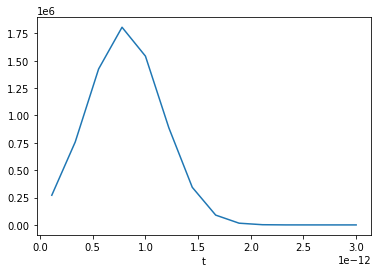

In [ ]:
power.sum(dim="λ").plot();   # more than 2D -> histogram

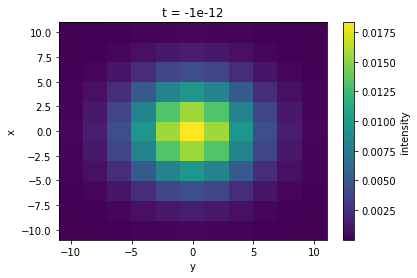

In [ ]:
laser_intensity.loc[{"t": -1e-12}].plot();

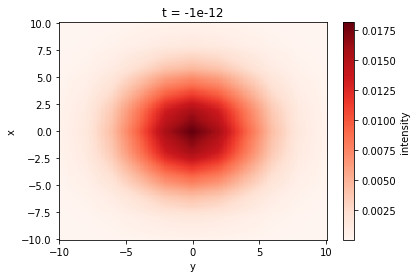

In [ ]:
laser_intensity.interp(t=-1e-12, x=np.linspace(-10, 10, 200), y=np.linspace(-10, 10, 200)).plot(cmap="Reds");

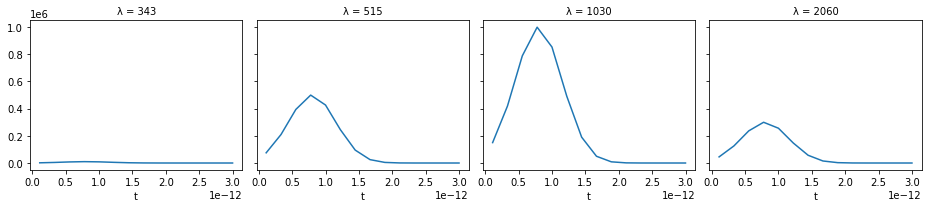

In [ ]:
power.plot.line(col='λ')   # 3D array faceted to 2D

## Many other things not covered (but similar to Pandas or domain specific)

Go check out the docs at [xarray.pydata.org](https://xarray.pydata.org/en/stable/index.html)
- stacking (flattening) dimensions into `MultiIndex`
- group-by (split-apply-combine) operations
- rolling windows, coarsening, weighted aggregations
- combining (`xr.concat`) data
- interpolating data
- polynomial fitting
- squeezing, expanding, reordering dimensions
- IO backends
- registering accessors (composition over inheritance)
- visualization plugins
- vectorized functions
- parallelization
- ...

### Further reading

- [Xarray official documentation](http://xarray.pydata.org/en/stable/)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=77a5caea-ff40-471d-8b4b-98dc66dd30c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>